In [1]:
# basic dependencies

import numpy as np
from numpy import loadtxt
from numpy import savetxt

import pandas as pd
import math
import time
import joblib

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

###########

# torch dependencies
import torch

tkwargs = {"dtype": torch.double, # set as double to minimize zero error for cholesky decomposition error
           "device": torch.device("cuda:0" if torch.cuda.is_available() else "cpu")} # set tensors to GPU, if multiple GPUs please set cuda:x properly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.set_printoptions(precision=3)

###########

# plotting dependencies
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# sk dependencies
import sklearn

from botorch.utils.multi_objective.pareto import is_non_dominated
from botorch.utils.multi_objective.hypervolume import Hypervolume

In [2]:
df = pd.read_csv('MOCPredictionsNG.csv')
df

,Cond,Qtsc,Qag,Qpva,Qseed,Qaa,y1,y2,y3,c1,c2,c3
0,1,1,1,1,1,1,0.265554,0.004754,0.958326,-0.700000,0.000000,0.190789
1,2,1,2,1,1,1,0.267820,0.004780,0.958326,-1.700000,-0.500000,0.192770
2,3,1,3,1,1,1,0.271684,0.004809,0.958327,-2.700000,-1.333333,0.192921
3,4,1,4,1,1,1,0.276726,0.004841,0.958327,-3.700000,-2.250000,0.191607
4,5,1,5,1,1,1,0.282458,0.004877,0.958328,-4.700000,-3.200000,0.189235
...,...,...,...,...,...,...,...,...,...,...,...,...
7962619,7962620,24,20,24,24,24,0.262729,0.029700,0.000001,-0.533333,-0.033333,-0.040578
7962620,7962621,24,21,24,24,24,0.261640,0.030388,0.000002,-0.575000,-0.017857,0.010827
7962621,7962622,24,22,24,24,24,0.261245,0.031059,0.000002,-0.616667,-0.007576,0.056171
7962622,7962623,24,23,24,24,24,0.261650,0.031711,0.000002,-0.658333,-0.001812,0.093593


In [3]:
obj_list = df.columns[6:8 +1]
train_y = df[obj_list].to_numpy()
torch_y = torch.tensor(train_y, **tkwargs)

In [4]:
con_list = df.columns[9:10 +1]
train_con = df[con_list].to_numpy()
torch_con = torch.tensor(train_con, **tkwargs)
feas_con = (torch_con <= 0).all(axis=1)

In [5]:
infeas_y = torch_y[~feas_con]
feas_y = torch_y[feas_con]

In [14]:
t1 = time.time()

hv=Hypervolume(ref_point=torch.tensor([0,0,0], **tkwargs))
hvs = []

max_iter = feas_y.shape[0]
for i in range(0,max_iter):
    hvs.append(hv.compute(feas_y[i].unsqueeze(0)))
    
    if i%10000 == 0:
        t2 = time.time()
        print(f"{i}/{max_iter} iterations. Time taken so far: {t2-t1:>4.3f}s")

0/4503168 iterations. Time taken so far: 0.004s
10000/4503168 iterations. Time taken so far: 7.728s
20000/4503168 iterations. Time taken so far: 15.282s
30000/4503168 iterations. Time taken so far: 22.889s
40000/4503168 iterations. Time taken so far: 30.731s
50000/4503168 iterations. Time taken so far: 38.544s
60000/4503168 iterations. Time taken so far: 46.201s
70000/4503168 iterations. Time taken so far: 53.705s
80000/4503168 iterations. Time taken so far: 61.269s
90000/4503168 iterations. Time taken so far: 68.767s
100000/4503168 iterations. Time taken so far: 76.309s
110000/4503168 iterations. Time taken so far: 84.064s
120000/4503168 iterations. Time taken so far: 91.888s
130000/4503168 iterations. Time taken so far: 99.802s
140000/4503168 iterations. Time taken so far: 107.419s
150000/4503168 iterations. Time taken so far: 114.984s
160000/4503168 iterations. Time taken so far: 122.508s
170000/4503168 iterations. Time taken so far: 130.075s
180000/4503168 iterations. Time taken so

1490000/4503168 iterations. Time taken so far: 1190.308s
1500000/4503168 iterations. Time taken so far: 1197.701s
1510000/4503168 iterations. Time taken so far: 1205.340s
1520000/4503168 iterations. Time taken so far: 1212.504s
1530000/4503168 iterations. Time taken so far: 1219.855s
1540000/4503168 iterations. Time taken so far: 1227.528s
1550000/4503168 iterations. Time taken so far: 1234.837s
1560000/4503168 iterations. Time taken so far: 1242.429s
1570000/4503168 iterations. Time taken so far: 1250.187s
1580000/4503168 iterations. Time taken so far: 1257.725s
1590000/4503168 iterations. Time taken so far: 1265.126s
1600000/4503168 iterations. Time taken so far: 1272.879s
1610000/4503168 iterations. Time taken so far: 1280.692s
1620000/4503168 iterations. Time taken so far: 1287.804s
1630000/4503168 iterations. Time taken so far: 1296.139s
1640000/4503168 iterations. Time taken so far: 1304.225s
1650000/4503168 iterations. Time taken so far: 1311.833s
1660000/4503168 iterations. Tim

2930000/4503168 iterations. Time taken so far: 2274.743s
2940000/4503168 iterations. Time taken so far: 2281.768s
2950000/4503168 iterations. Time taken so far: 2289.503s
2960000/4503168 iterations. Time taken so far: 2296.950s
2970000/4503168 iterations. Time taken so far: 2304.844s
2980000/4503168 iterations. Time taken so far: 2311.722s
2990000/4503168 iterations. Time taken so far: 2319.374s
3000000/4503168 iterations. Time taken so far: 2327.059s
3010000/4503168 iterations. Time taken so far: 2334.536s
3020000/4503168 iterations. Time taken so far: 2341.611s
3030000/4503168 iterations. Time taken so far: 2348.821s
3040000/4503168 iterations. Time taken so far: 2356.589s
3050000/4503168 iterations. Time taken so far: 2364.178s
3060000/4503168 iterations. Time taken so far: 2371.314s
3070000/4503168 iterations. Time taken so far: 2379.194s
3080000/4503168 iterations. Time taken so far: 2387.028s
3090000/4503168 iterations. Time taken so far: 2394.444s
3100000/4503168 iterations. Tim

4370000/4503168 iterations. Time taken so far: 3359.263s
4380000/4503168 iterations. Time taken so far: 3366.917s
4390000/4503168 iterations. Time taken so far: 3373.793s
4400000/4503168 iterations. Time taken so far: 3381.465s
4410000/4503168 iterations. Time taken so far: 3388.501s
4420000/4503168 iterations. Time taken so far: 3395.942s
4430000/4503168 iterations. Time taken so far: 3403.612s
4440000/4503168 iterations. Time taken so far: 3411.233s
4450000/4503168 iterations. Time taken so far: 3418.686s
4460000/4503168 iterations. Time taken so far: 3426.263s
4470000/4503168 iterations. Time taken so far: 3434.023s
4480000/4503168 iterations. Time taken so far: 3441.615s
4490000/4503168 iterations. Time taken so far: 3448.416s
4500000/4503168 iterations. Time taken so far: 3456.090s


In [15]:
savetxt(f"NG_hvs.csv", hvs, delimiter=',') 

In [23]:
hvs = loadtxt(f"NG_hvs.csv", delimiter=',')
norm = plt.Normalize(hvs.min(), hvs.max())

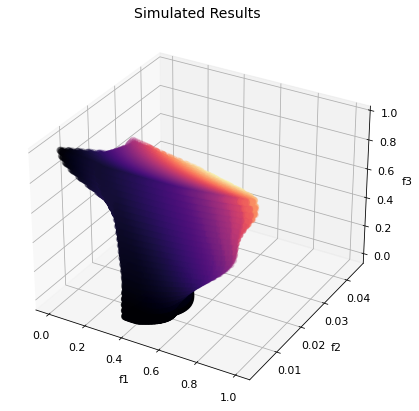

In [31]:
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(feas_y[:,0].cpu().numpy(), feas_y[:,1].cpu().numpy(), feas_y[:,2].cpu().numpy(),
             c=hvs, s=40, norm=norm, cmap='magma', alpha=0.2)

ax.set_title(f"Simulated Results", fontsize=14)

ax.set_xlabel('f1', fontsize=11)
ax.set_ylabel('f2', fontsize=11)
ax.set_zlabel('f3', fontsize=11)

plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)

In [3]:
df = pd.read_csv('MOCPredictions.csv')
df

,Cond,Qtsc,Qag,Qpva,Qseed,Qaa,y1,y2,y3,c1,c2
0,1,1,1,1,1,1,0.101651,0.004754,0.958326,-0.700000,0.000000
1,2,1,2,1,1,1,0.103515,0.004780,0.958326,-1.700000,-0.500000
2,3,1,3,1,1,1,0.108805,0.004809,0.958327,-2.700000,-1.333333
3,4,1,4,1,1,1,0.116676,0.004841,0.958327,-3.700000,-2.250000
4,5,1,5,1,1,1,0.126128,0.004877,0.958328,-4.700000,-3.200000
...,...,...,...,...,...,...,...,...,...,...,...
7962619,7962620,24,20,24,24,24,0.199804,0.029700,0.000001,-0.533333,-0.033333
7962620,7962621,24,21,24,24,24,0.171726,0.030388,0.000002,-0.575000,-0.017857
7962621,7962622,24,22,24,24,24,0.145197,0.031059,0.000002,-0.616667,-0.007576
7962622,7962623,24,23,24,24,24,0.122134,0.031711,0.000002,-0.658333,-0.001812


In [4]:
obj_list = df.columns[6:8 +1]
train_y = df[obj_list].to_numpy()
torch_y = torch.tensor(train_y, **tkwargs)

In [5]:
con_list = df.columns[9:10 +1]
train_con = df[con_list].to_numpy()
torch_con = torch.tensor(train_con, **tkwargs)
feas_con = (torch_con <= 0).all(axis=1)

In [7]:
infeas_y = torch_y[~feas_con]
feas_y = torch_y[feas_con]

In [10]:
t1 = time.time()

hv=Hypervolume(ref_point=torch.tensor([0,0,0], **tkwargs))
hvs = []

max_iter = feas_y.shape[0]
for i in range(0,max_iter):
    hvs.append(hv.compute(feas_y[i].unsqueeze(0)))
    
    if i%10000 == 0:
        t2 = time.time()
        print(f"{i}/{max_iter} iterations. Time taken so far: {t2-t1:>4.3f}s")

0/4503168 iterations. Time taken so far: 0.094s
10000/4503168 iterations. Time taken so far: 7.689s
20000/4503168 iterations. Time taken so far: 14.980s
30000/4503168 iterations. Time taken so far: 22.338s
40000/4503168 iterations. Time taken so far: 29.634s
50000/4503168 iterations. Time taken so far: 36.692s
60000/4503168 iterations. Time taken so far: 43.520s
70000/4503168 iterations. Time taken so far: 51.276s
80000/4503168 iterations. Time taken so far: 59.639s
90000/4503168 iterations. Time taken so far: 67.115s
100000/4503168 iterations. Time taken so far: 74.425s
110000/4503168 iterations. Time taken so far: 81.680s
120000/4503168 iterations. Time taken so far: 89.170s
130000/4503168 iterations. Time taken so far: 96.144s
140000/4503168 iterations. Time taken so far: 103.738s
150000/4503168 iterations. Time taken so far: 111.651s
160000/4503168 iterations. Time taken so far: 119.602s
170000/4503168 iterations. Time taken so far: 128.262s
180000/4503168 iterations. Time taken so

1490000/4503168 iterations. Time taken so far: 1123.758s
1500000/4503168 iterations. Time taken so far: 1131.532s
1510000/4503168 iterations. Time taken so far: 1138.841s
1520000/4503168 iterations. Time taken so far: 1146.508s
1530000/4503168 iterations. Time taken so far: 1153.775s
1540000/4503168 iterations. Time taken so far: 1160.737s
1550000/4503168 iterations. Time taken so far: 1167.789s
1560000/4503168 iterations. Time taken so far: 1175.046s
1570000/4503168 iterations. Time taken so far: 1182.355s
1580000/4503168 iterations. Time taken so far: 1189.781s
1590000/4503168 iterations. Time taken so far: 1197.187s
1600000/4503168 iterations. Time taken so far: 1203.806s
1610000/4503168 iterations. Time taken so far: 1210.280s
1620000/4503168 iterations. Time taken so far: 1216.821s
1630000/4503168 iterations. Time taken so far: 1223.698s
1640000/4503168 iterations. Time taken so far: 1231.159s
1650000/4503168 iterations. Time taken so far: 1238.811s
1660000/4503168 iterations. Tim

2930000/4503168 iterations. Time taken so far: 2163.553s
2940000/4503168 iterations. Time taken so far: 2170.880s
2950000/4503168 iterations. Time taken so far: 2178.127s
2960000/4503168 iterations. Time taken so far: 2184.791s
2970000/4503168 iterations. Time taken so far: 2192.289s
2980000/4503168 iterations. Time taken so far: 2199.220s
2990000/4503168 iterations. Time taken so far: 2207.216s
3000000/4503168 iterations. Time taken so far: 2213.972s
3010000/4503168 iterations. Time taken so far: 2221.461s
3020000/4503168 iterations. Time taken so far: 2228.838s
3030000/4503168 iterations. Time taken so far: 2235.691s
3040000/4503168 iterations. Time taken so far: 2242.703s
3050000/4503168 iterations. Time taken so far: 2250.152s
3060000/4503168 iterations. Time taken so far: 2257.095s
3070000/4503168 iterations. Time taken so far: 2263.715s
3080000/4503168 iterations. Time taken so far: 2271.317s
3090000/4503168 iterations. Time taken so far: 2278.826s
3100000/4503168 iterations. Tim

4370000/4503168 iterations. Time taken so far: 3232.266s
4380000/4503168 iterations. Time taken so far: 3240.252s
4390000/4503168 iterations. Time taken so far: 3248.410s
4400000/4503168 iterations. Time taken so far: 3256.308s
4410000/4503168 iterations. Time taken so far: 3263.621s
4420000/4503168 iterations. Time taken so far: 3271.435s
4430000/4503168 iterations. Time taken so far: 3278.064s
4440000/4503168 iterations. Time taken so far: 3285.536s
4450000/4503168 iterations. Time taken so far: 3292.845s
4460000/4503168 iterations. Time taken so far: 3300.442s
4470000/4503168 iterations. Time taken so far: 3307.392s
4480000/4503168 iterations. Time taken so far: 3314.926s
4490000/4503168 iterations. Time taken so far: 3322.328s
4500000/4503168 iterations. Time taken so far: 3330.285s


In [11]:
savetxt(f"normal_hvs.csv", hvs, delimiter=',') 

In [12]:
hvs = loadtxt(f"normal_hvs.csv", delimiter=',')
norm = plt.Normalize(hvs.min(), hvs.max())

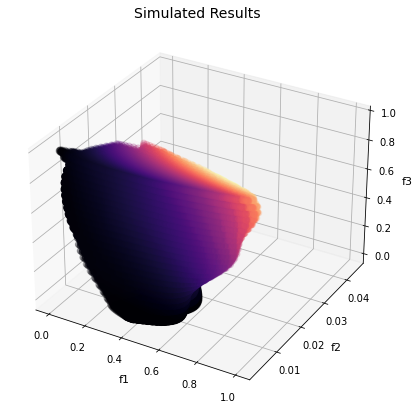

In [13]:
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(feas_y[:,0].cpu().numpy(), feas_y[:,1].cpu().numpy(), feas_y[:,2].cpu().numpy(),
             c=hvs, s=40, norm=norm, cmap='magma', alpha=0.2)

ax.set_title(f"Simulated Results", fontsize=14)

ax.set_xlabel('f1', fontsize=11)
ax.set_ylabel('f2', fontsize=11)
ax.set_zlabel('f3', fontsize=11)

plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)

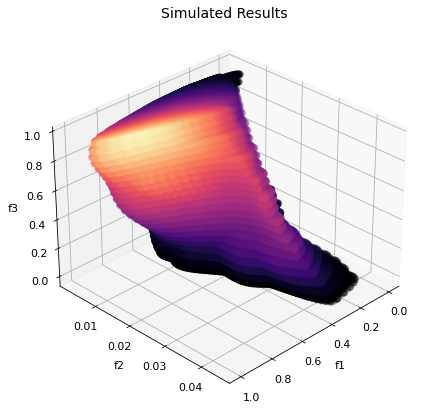

In [14]:
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(feas_y[:,0].cpu().numpy(), feas_y[:,1].cpu().numpy(), feas_y[:,2].cpu().numpy(),
             c=hvs, s=40, norm=norm, cmap='magma', alpha=0.2)

ax.set_title(f"Simulated Results", fontsize=14)

ax.set_xlabel('f1', fontsize=11)
ax.set_ylabel('f2', fontsize=11)
ax.set_zlabel('f3', fontsize=11)

plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)

ax.view_init(azim=45)

In [18]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, binwidth):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

(-0.1, 1.1)

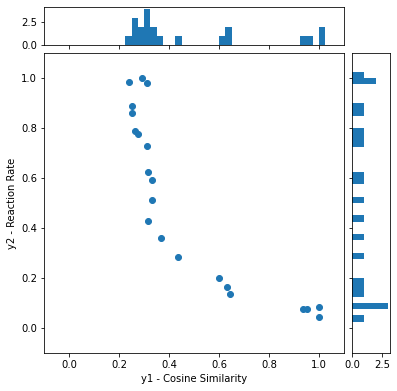

In [27]:
fig = plt.figure(figsize=(6, 6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(8, 1), height_ratios=(1, 8),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# Draw the scatter plot and marginals.
scatter_hist(pareto_y[:,0], pareto_y[:,1], ax, ax_histx, ax_histy, binwidth=0.025)

ax.set_xlabel('y1 - Cosine Similarity')
ax.set_ylabel('y2 - Reaction Rate')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

(-0.1, 1.1)

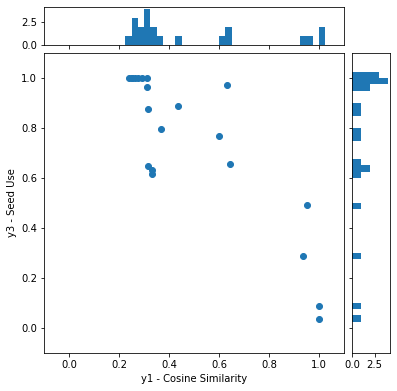

In [28]:
fig = plt.figure(figsize=(6, 6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(8, 1), height_ratios=(1, 8),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# Draw the scatter plot and marginals.
scatter_hist(pareto_y[:,0], pareto_y[:,2], ax, ax_histx, ax_histy, binwidth=0.025)

ax.set_xlabel('y1 - Cosine Similarity')
ax.set_ylabel('y3 - Seed Use')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

(-0.1, 1.1)

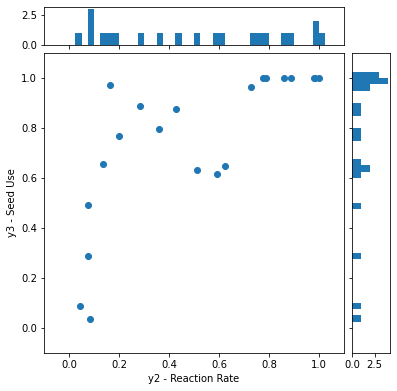

In [29]:
fig = plt.figure(figsize=(6, 6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(8, 1), height_ratios=(1, 8),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# Draw the scatter plot and marginals.
scatter_hist(pareto_y[:,1], pareto_y[:,2], ax, ax_histx, ax_histy, binwidth=0.025)

ax.set_xlabel('y2 - Reaction Rate')
ax.set_ylabel('y3 - Seed Use')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)